# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available'].copy(deep=True)
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

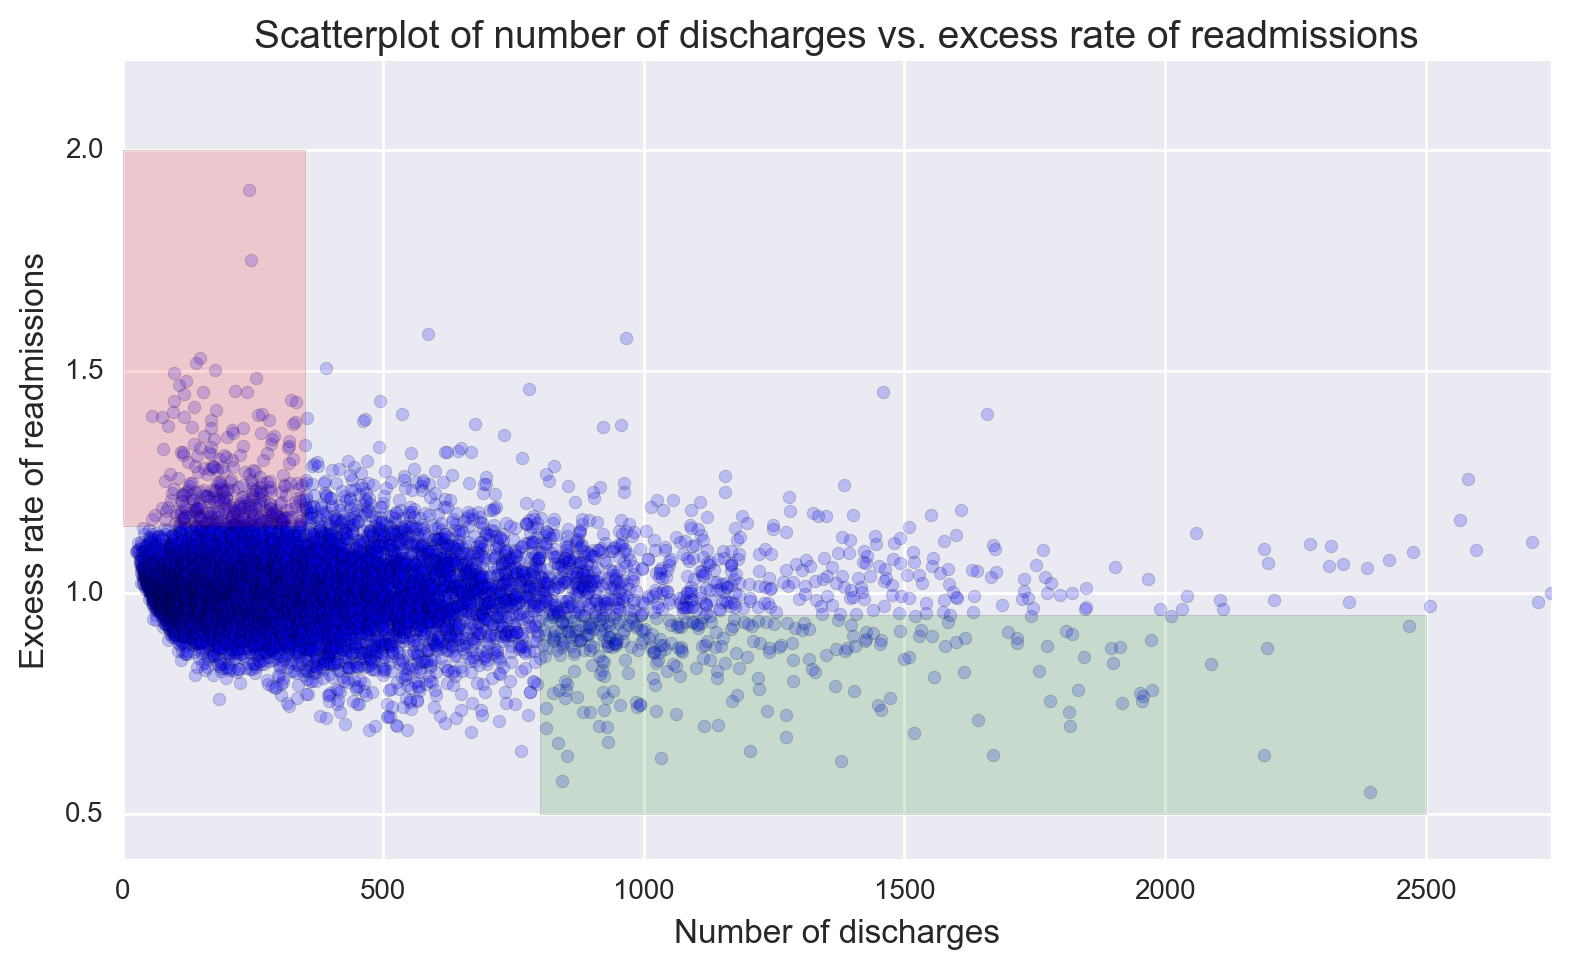

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges

_Based on the plot, I do not believe it is possible to tell that rate of readmissions is trending down with increasing number of discharges. The scatter plot looks fairly symmetrical around excess rate of readmissions = 1._
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)

_There may be some correlation here, but as stated above, the graph doesn't point towards any conclusive evidence._
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

_Same as above. Nothing conclusive can be drawn from simply the graph alone._

**B. Statistics**

In [5]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [6]:
hospitalnotnull = clean_hospital_read_df[clean_hospital_read_df['Number of Readmissions'].notnull()]
hospitalnotnull.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


In [7]:
under100mean = np.mean(hospitalnotnull['Excess Readmission Ratio'][hospitalnotnull['Number of Discharges'] < 100])
under100proportion = len(hospitalnotnull[(hospitalnotnull['Number of Discharges'] < 100) &
                                         (hospitalnotnull['Excess Readmission Ratio'] > 1.0)]) / \
                     len(hospitalnotnull[hospitalnotnull['Number of Discharges'] < 100])
print(under100mean, under100proportion)

1.0226183501683506 0.6321548821548821


In [8]:
over1000mean = np.mean(hospitalnotnull['Excess Readmission Ratio'][hospitalnotnull['Number of Discharges'] > 1000])
over1000proportion = len(hospitalnotnull[(hospitalnotnull['Number of Discharges'] > 1000) &
                                         (hospitalnotnull['Excess Readmission Ratio'] > 1.0)]) / \
                     len(hospitalnotnull[hospitalnotnull['Number of Discharges'] > 1000])
print(over1000mean, over1000proportion)

0.9783354211663071 0.4449244060475162


+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

_These are both correct. Verfied above._

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates.

_This is inconclusive based on the scatter plot above_
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

_Possibly, but again inconclusive._

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

_Both these recommendations are unfounded based on the current statistical analysis._

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

_Let us first setup the test (based on the first regulatory policy recommendation) that hospitals with small capacity (<=300) have a higher mean readmission ratio than hospitals with large capacity (>300)_

_Null hypothesis: Small hospitals and large hospitals have the same mean readmission ratio._

_Alternative hypothesis: Small hospitals have a greater mean readmission ratio than large hospitals._

_We can use a hypothesis test to compare population means._

In [9]:
under300mean = np.mean(hospitalnotnull['Excess Readmission Ratio'][hospitalnotnull['Number of Discharges'] <= 300])
under300std = np.std(hospitalnotnull['Excess Readmission Ratio'][hospitalnotnull['Number of Discharges'] <= 300])
under300size = len(hospitalnotnull['Excess Readmission Ratio'][hospitalnotnull['Number of Discharges'] <= 300])

over300mean = np.mean(hospitalnotnull['Excess Readmission Ratio'][hospitalnotnull['Number of Discharges'] > 300])
over300std = np.std(hospitalnotnull['Excess Readmission Ratio'][hospitalnotnull['Number of Discharges'] > 300])
over300size = len(hospitalnotnull['Excess Readmission Ratio'][hospitalnotnull['Number of Discharges'] > 300])

print(under300mean, under300std, under300size, over300mean, over300std, over300size)

1.0142605512067822 0.0824190929921611 6132 0.9997810438024227 0.10122506337004333 5365


In [10]:
meandiff = under300mean - over300mean
stddiff = np.sqrt( (under300std**2)/under300size + (over300std**2)/over300size )
zscore = meandiff / stddiff
print(zscore)

8.33524822581


_With a $z$-statistic of 8.34, at a significance level of $a$ = 0.01, we can reject the null hypothesis. There appears to be conclusive evidence that smaller hospitals (discharges <= 300) have a greater mean excess readmission ratio than larger hospitals (discharges > 300)._

_Statistical and practical significance are the same here. There appears to be conclusive evidence that smaller hospitals should either one: be required to upgrade their resources to better care for patients or two: consolidate with other local area hospitals to better afford higher-quality resources._

_Recommendations to the client should remain unchanged in light of these findings._

In [11]:
max(hospitalnotnull['Number of Discharges'])

6793

In [12]:
bins = [x for x in range(0, 2501, 250)]
bins.append(max(hospitalnotnull['Number of Discharges']))
bins

[0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 6793]

In [13]:
discharge_bins = hospitalnotnull['Excess Readmission Ratio'].groupby(pd.cut(hospitalnotnull['Number of Discharges'], bins)).agg([np.mean, len])

In [14]:
discharge_bins

,mean,len
Number of Discharges,,
"(0, 250]",1.015059,5092.0
"(250, 500]",1.005654,3800.0
"(500, 750]",1.000445,1544.0
"(750, 1000]",0.995736,598.0
"(1000, 1250]",0.982586,238.0
"(1250, 1500]",0.984374,105.0
"(1500, 1750]",0.985863,57.0
"(1750, 2000]",0.899345,31.0
"(2000, 2250]",0.956958,12.0


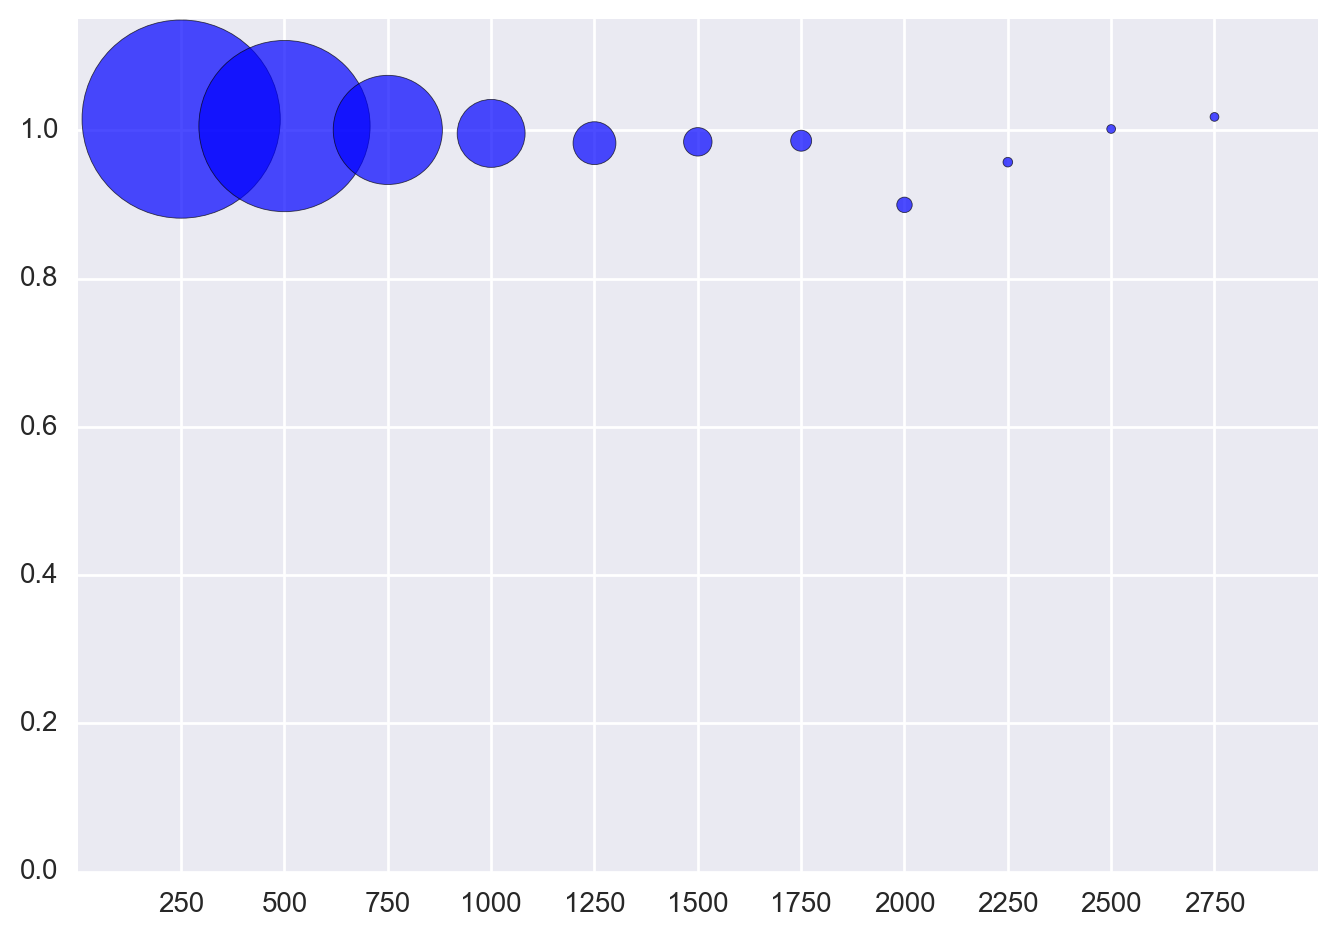

In [15]:
xbins = bins[1:-1]
xbins.append(2750)
xbins

plt.scatter(x=xbins, y=discharge_bins['mean'], s=discharge_bins['len'], alpha=0.7)
plt.xticks(xbins)
plt.ylim(0, 1.15)
plt.show()

_The advantage of the scatterplot is that is shows the full distribution of the data. The disadvantage is that since there are so many data points in the data, the scatterplot is too busy - has too much information._

_I constructed a bubble plot which binned the hospitals by number of discharges, with the size of the bubble being the number of hospitals in the bin, and the Y-value being the average excess readmission ratio of that bin._